## Project On Mall custpmers

### Mall Customer Segmentation Data - Clustering and Analysis

1. Importing the libraries
A Python library is a collection of related modules. It contains bundles of code that can be used repeatedly in different programs. It makes Python Programming simpler and convenient for the programmer. As we don't need to write the same code again and again for different programs.

In this notebook, we will be using the following libraries.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Importing the data

In [21]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
df.shape

(200, 5)

### Exploratory Data Analysis

#### Data Over view

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [103]:
df.isnull().sum()

CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Gender                    0
dtype: int64

### EDA

In [26]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [27]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

plt.figure(figsize=(3,3))
pd.Series(ds['Gender']).value_counts().plot(kind ='pie', autopct='%1.2f%%')

In [28]:
df.groupby('Gender').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,
Female,97.562500,38.098214,59.250000,51.526786
Male,104.238636,39.806818,62.227273,48.511364


### Plotting the Annual Income Column vs the Spending Score

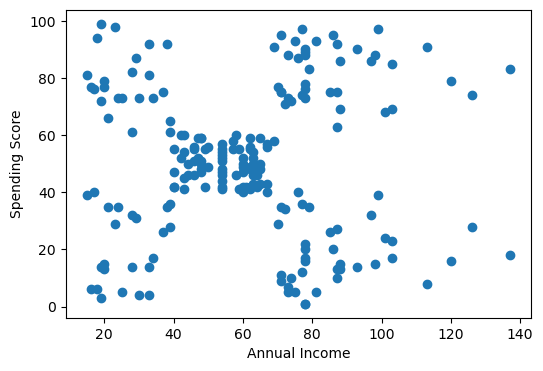

In [29]:
plt.figure(figsize = (6, 4))
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

<Figure size 900x900 with 0 Axes>

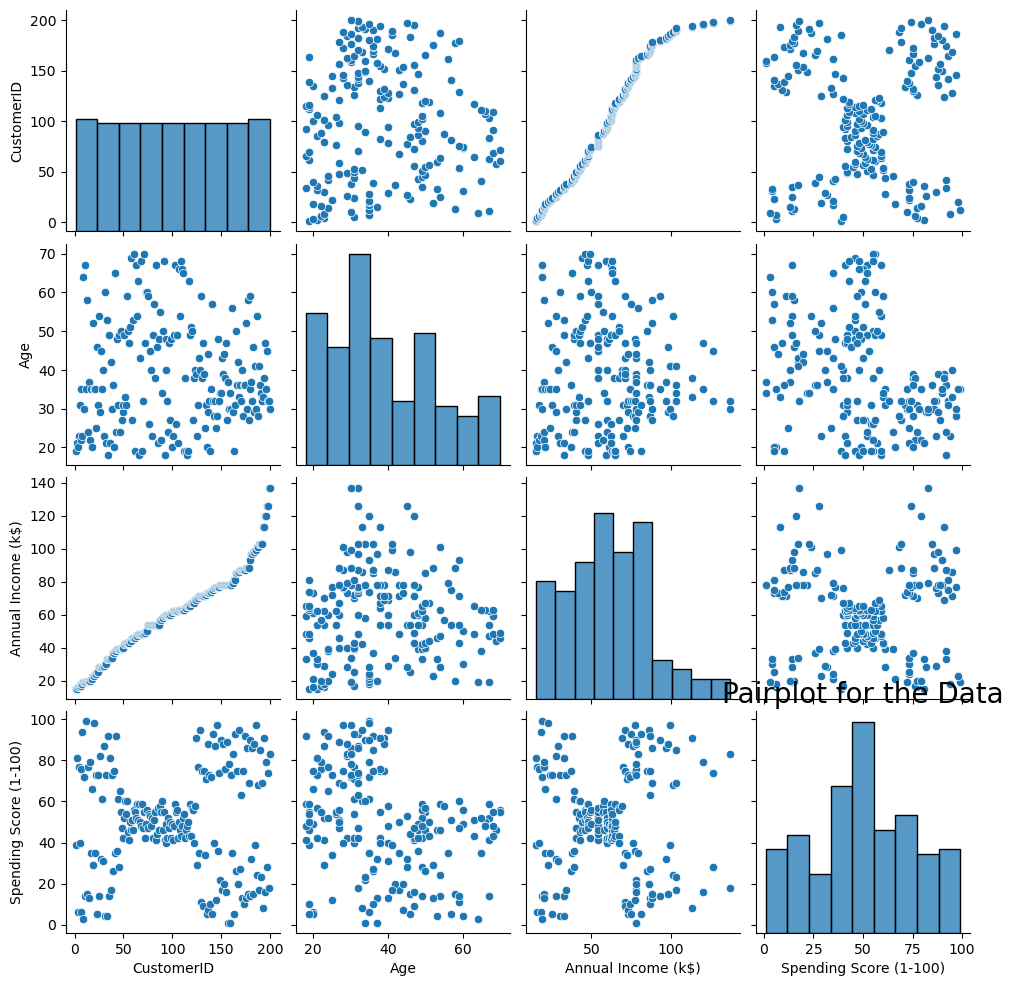

In [30]:
plt.figure(figsize=(9,9))
sns.pairplot(df)
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

### converting Gender column datatype from object to int

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['Gender'])
label

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1])

In [32]:
df.drop("Gender", axis=1, inplace=True)
 
df["Gender"] = label
 
df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,0
196,197,45,126,28,0
197,198,32,126,74,1
198,199,32,137,18,1


### Heatmap of Data

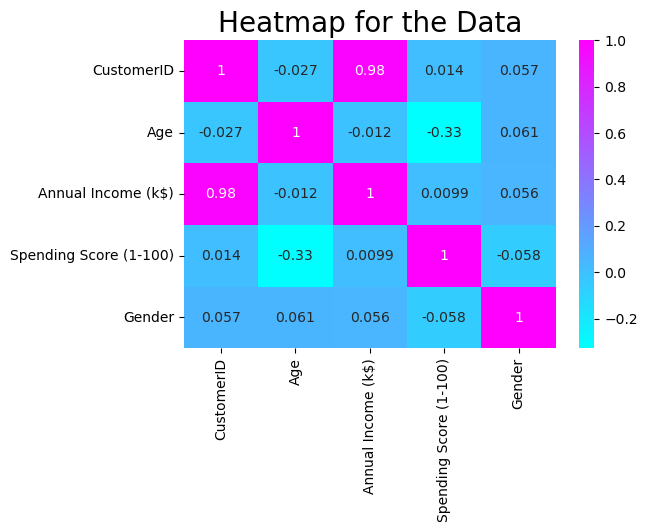

In [98]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), cmap = 'cool', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

### Analysis between Gender and Spending Score

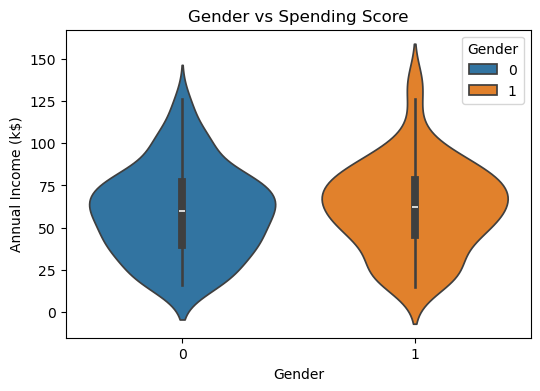

In [34]:
plt.figure(figsize=(6, 4))

sns.violinplot(x='Gender', y='Annual Income (k$)', data=ds,hue = 'Gender')
plt.title('Gender vs Spending Score')

plt.show()

#### BoxPlot of Annual Income and Spending Score on Gender

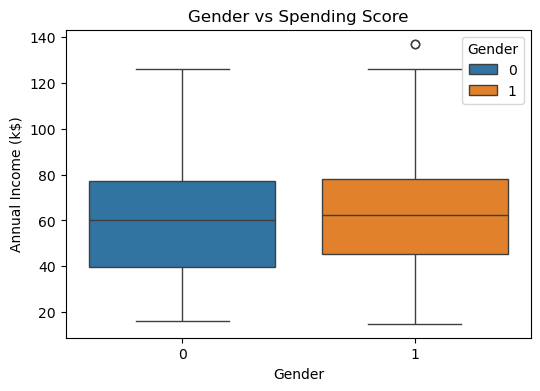

In [35]:
plt.figure(figsize=(6,4))

sns.boxplot(x='Gender', y='Annual Income (k$)', data=ds,hue = 'Gender')
plt.title('Gender vs Spending Score')

plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

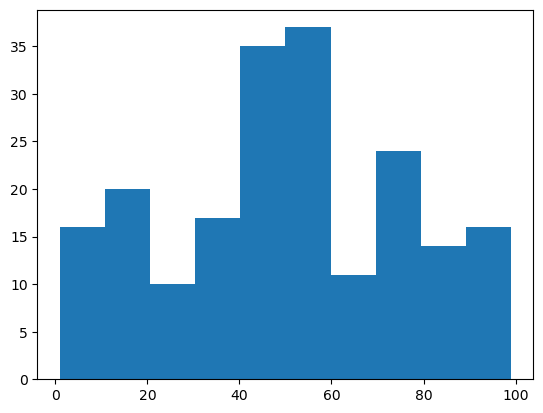

In [36]:
plt.hist(df['Spending Score (1-100)'])
plt.show

In [38]:
X = df[['Gender','Age',	'Annual Income (k$)']]

X.head()

,Gender,Age,Annual Income (k$)
0,1,19,15
1,1,21,15
2,0,20,16
3,0,23,16
4,0,31,17


In [39]:
y = df['Spending Score (1-100)']
y.sample()

87    55
Name: Spending Score (1-100), dtype: int64

### Train-Test Split

We will split the data into training and testing sets.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training

We will train multiple models and compare their performance.

### Linear Regression

In [46]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)


y_pred_ridge = ridge_model.predict(X_test)

# Evaluation
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)



print('Ridge Regression Performance:')
print('MAE:', mae_ridge)
print('MSE:', mse_ridge)
print('RMSE:', rmse_ridge)
print('R-squared:', r2_ridge)

Ridge Regression Performance:
MAE: 18.153287134629714
MSE: 480.7368388953917
RMSE: 21.9257118218632
R-squared: 0.025349041246874315


### Ridge Regression

In [47]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print('Ridge Regression Performance:')
print('MAE:', mae_ridge)
print('MSE:', mse_ridge)
print('RMSE:', rmse_ridge)
print('R-squared:', r2_ridge)

Ridge Regression Performance:
MAE: 18.153287134629714
MSE: 480.7368388953917
RMSE: 21.9257118218632
R-squared: 0.025349041246874315


### Lasso Regression

In [48]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)


mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)


print('Lasso Regression Performance:')
print('MAE:', mae_lasso)
print('MSE:', mse_lasso)
print('RMSE:', rmse_lasso)
print('R-squared:', r2_lasso)

Lasso Regression Performance:
MAE: 18.17621447279456
MSE: 481.55159480200274
RMSE: 21.944283875351292
R-squared: 0.02369719649257407


### OLS Model

In [50]:
new_X_train =  sm.add_constant(X_train)

ols_model = sm.OLS(y_train,new_X_train).fit()
ols_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Spending Score (1-100)   R-squared:                       0.100
Model:                                OLS   Adj. R-squared:                  0.082
Method:                     Least Squares   F-statistic:                     5.763
Date:                    Sat, 13 Jul 2024   Prob (F-statistic):           0.000917
Time:                            12:12:37   Log-Likelihood:                -741.98
No. Observations:                     160   AIC:                             1492.
Df Residuals:                         156   BIC:                             1504.
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 71.9050      7.636      9.417      0.000      56.823      86.987
Gender                -1.1985      4.051     -0.296      0.768      -9.201       6.804
Age                   -0.5879      0.145     -4.056      0.000      -0.874      -0.302
Annual Income (k$)     0.0539      0.073      0.733      0.465      -0.091       0.199
==============================================================================
Omnibus:                        8.718   Durbin-Watson:                   2.236
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                6.218
Skew:                          -0.356   Prob(JB):                       0.0446
Kurtosis:                       2.348   Cond. No.                         292.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
new_X_test = sm.add_constant(X_test)

y_pred_ols = ols_model.predict(new_X_test)

In [102]:
mae_ols = mean_absolute_error(y_test,y_pred_ols)
mse_ols = mean_squared_error(y_test,y_pred_ols)
rmse_ols = np.sqrt(mse_ols)
r2_ols = r2_score(y_test,y_pred_ols)


print('OLS  Performance:')
print('MAE:', mae_ols)
print('MSE:', mse_ols)
print('RMSE:', rmse_ols)
print('R-squared:', r2_ols)

OLS  Performance:
MAE: 18.1513953266851
MSE: 480.67314170724785
RMSE: 21.924259205438343
R-squared: 0.02547818160074633


## Model Evaluation

We will compare the performance of the models using the evaluation metrics.

In [92]:
model_info = {
                'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression','OLS Method'],
                'MAE': [mae_lr, mae_ridge, mae_lasso, mae_ols],
                'MSE': [mse_lr, mse_ridge, mse_lasso, mse_ols],
                'RMSE': [rmse_lr, rmse_ridge, rmse_lasso, rmse_ols],
                'R-squared': [r2_lr, r2_ridge, r2_lasso, r2_ols]
            }

performance   = pd.DataFrame(model_info)
performance

,Model,MAE,MSE,RMSE,R-squared
0,Linear Regression,18.151395,480.673142,21.924259,0.025478
1,Ridge Regression,18.153287,480.736839,21.925712,0.025349
2,Lasso Regression,18.176214,481.551595,21.944284,0.023697
3,OLS Method,18.151395,480.673142,21.924259,0.025478


In [93]:
performance[performance['R-squared']   == performance['R-squared'].max()]

,Model,MAE,MSE,RMSE,R-squared
3,OLS Method,18.151395,480.673142,21.924259,0.025478


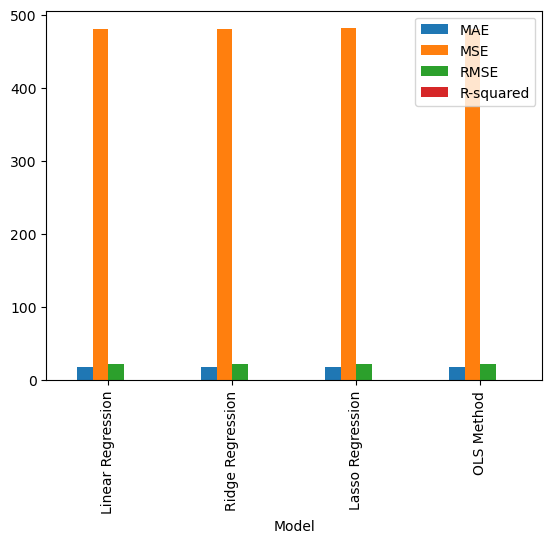

In [94]:
performance.plot(kind='bar', x = 'Model')
plt.show()

### Final Model

In [104]:
import joblib

# Save the best model
joblib.dump(ridge_model, 'Spending_Score_prediction.pkl')

['Spending_Score_prediction.pkl']

In [106]:
df.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Gender'],
      dtype='object')

In [111]:
pre = joblib.load('Spending_Score_prediction.pkl')


new_data = np.array([[44,6494565,1]])  # Example new data




predicted = pre.predict(new_data)

print('Predicted :', predicted)

Predicted : [-3818384.65375246]
